In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
data = pd.read_csv('drive/MyDrive/Colab Notebooks/foodhub_orders.csv')

In [6]:
# Display the first few rows of the data
print(data.head())

# Get basic summary statistics of the numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  
           order_id    customer_

In [7]:
# Question 1: How many rows and columns are present in the data?
num_rows, num_columns = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1898
Number of columns: 9


In [8]:
# Question 2: What are the datatypes of the different columns in the dataset?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [9]:
# Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [10]:
# Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?
prep_time_summary = data['food_preparation_time'].describe()
print("Food Preparation Time Summary:\n", prep_time_summary)

Food Preparation Time Summary:
 count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [11]:
# Question 5: How many orders are not rated?
not_given_ratings = data[data['rating'] == 'Not given'].shape[0]
print("Number of orders with 'not given' rating:", not_given_ratings)

Number of orders with 'not given' rating: 736


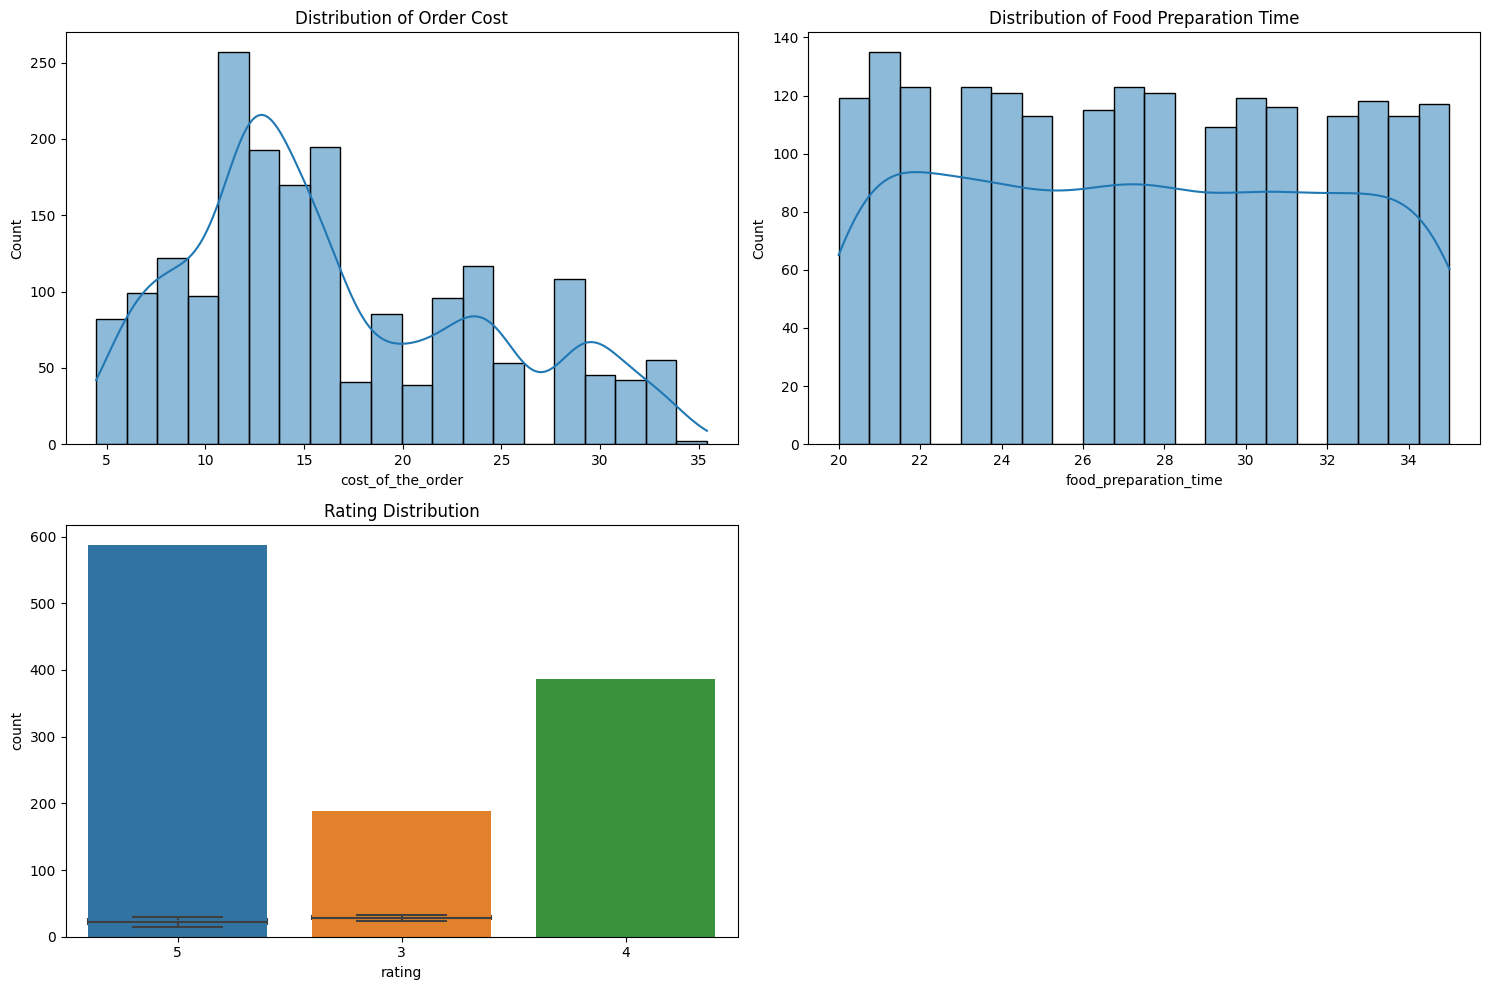

In [12]:
# Question 6: Explore all the variables and provide observations on their distributions.
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['cost_of_the_order'], bins=20, kde=True)
plt.title("Distribution of Order Cost")

plt.subplot(2, 2, 2)
sns.histplot(data['food_preparation_time'], bins=20, kde=True)
plt.title("Distribution of Food Preparation Time")

plt.subplot(2, 2, 3)
sns.boxplot(x=data['day_of_the_week'], y=data['delivery_time'])
plt.title("Delivery Time Distribution on Different Days")

sns.countplot(data=data[data['rating'] != 'Not given'], x='rating')
plt.title("Rating Distribution")

plt.tight_layout()
plt.show()

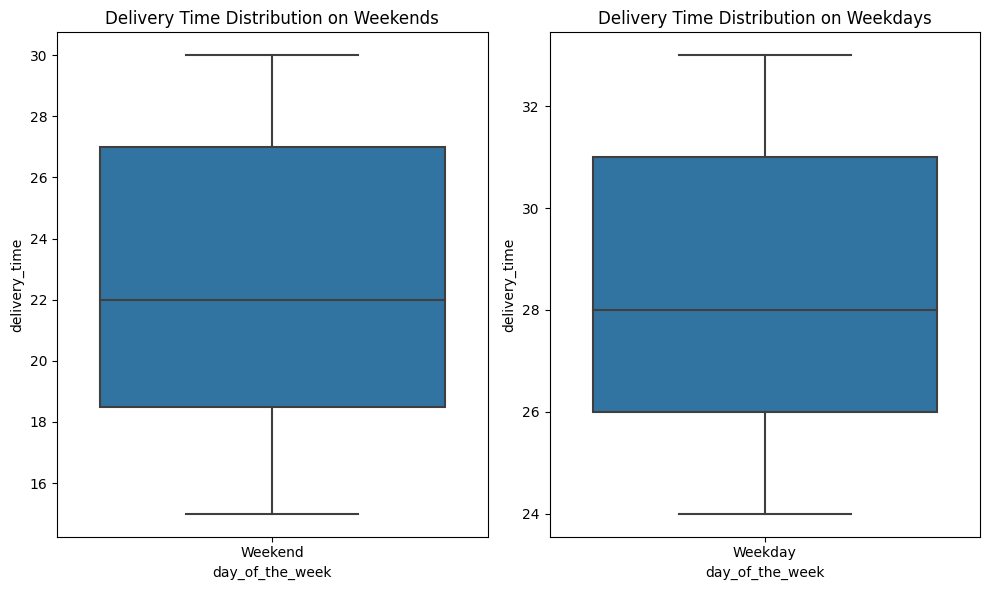

In [13]:
plt.figure(figsize=(10, 6))

# Create a boxplot for delivery time on weekends
plt.subplot(1, 2, 1)
sns.boxplot(data=data[data['day_of_the_week'] == 'Weekend'], x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time Distribution on Weekends")

# Create a boxplot for delivery time on weekdays
plt.subplot(1, 2, 2)
sns.boxplot(data=data[data['day_of_the_week'] == 'Weekday'], x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time Distribution on Weekdays")

plt.tight_layout()
plt.show()

In [14]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received?
top_restaurants = data['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants:\n", top_restaurants)

Top 5 restaurants:
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


In [15]:
# Question 8: Which is the most popular cuisine on weekends?
most_popular_cuisine_weekend = data[data['day_of_the_week'].isin(['Weekend'])]['cuisine_type'].value_counts().idxmax()
print("Most popular cuisine on weekends:", most_popular_cuisine_weekend)

Most popular cuisine on weekends: American


In [16]:
# Question 9: What percentage of the orders cost more than 20 dollars?
percentage_expensive_orders = (data[data['cost_of_the_order'] > 20].shape[0] / num_rows) * 100
print("Percentage of orders costing more than 20 dollars:", percentage_expensive_orders)

Percentage of orders costing more than 20 dollars: 29.24130663856691


In [17]:
# Question 10: What is the mean order delivery time?
mean_delivery_time = data['delivery_time'].mean()
print("Mean Order Delivery Time:", mean_delivery_time)

Mean Order Delivery Time: 24.161749209694417


In [18]:
# Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.
top_customers = data['customer_id'].value_counts().head(3)
print("Top 3 frequent customers:\n", top_customers)

Top 3 frequent customers:
 52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


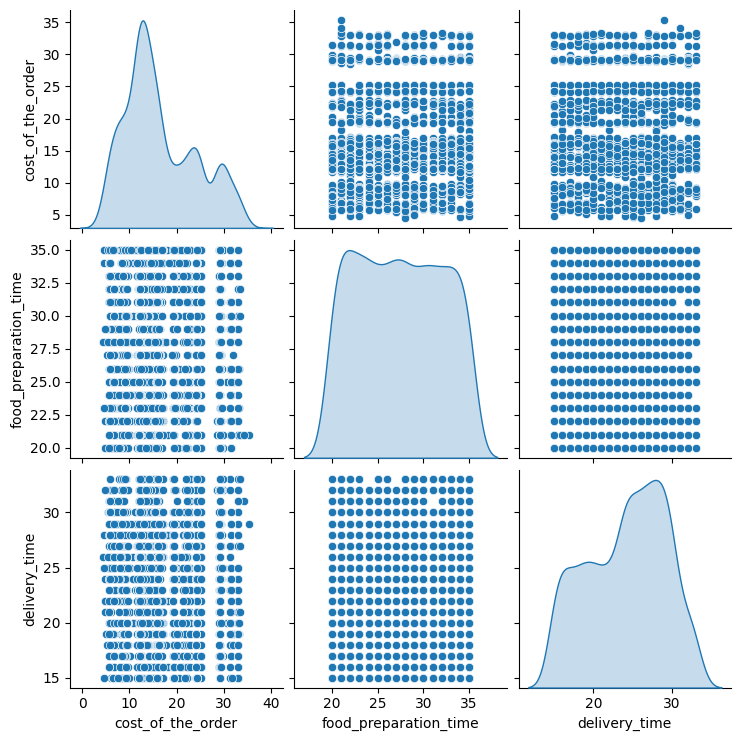

In [19]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset.
sns.pairplot(data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']], diag_kind='kde')
plt.show()

In [21]:
# Convert 'rating' column to numeric (excluding "Not given" values)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Question 13: Find the restaurants fulfilling the criteria to get the promotional offer.
promotional_restaurants = data[data['rating'] > 4].groupby('restaurant_name').filter(lambda x: len(x) > 50)
promotional_restaurants = promotional_restaurants['restaurant_name'].unique()
print("Restaurants eligible for promotional offer:\n", promotional_restaurants)

Restaurants eligible for promotional offer:
 ['Shake Shack' 'The Meatball Shop']


In [23]:
# Question 14: Find the net revenue generated by the company across all orders.
# Calculate revenue for each order
margin_per_order = 2  # Example margin value
data['revenue'] = data['cost_of_the_order'] - margin_per_order

# Calculate net revenue
net_revenue = data['revenue'].sum()
print("Net Revenue:", net_revenue)

Net Revenue: 27518.82


In [24]:
# Question 15: What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?
percentage_slow_delivery = (data[data['delivery_time'] + data['food_preparation_time'] > 60].shape[0] / num_rows) * 100
print("Percentage of orders with delivery time > 60 minutes:", percentage_slow_delivery)

Percentage of orders with delivery time > 60 minutes: 10.537407797681771


In [25]:
# Question 16: How does the mean delivery time vary during weekdays and weekends?
mean_delivery_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print("Mean Delivery Time on Weekdays:", mean_delivery_weekday)
print("Mean Delivery Time on Weekends:", mean_delivery_weekend)

Mean Delivery Time on Weekdays: 28.340036563071298
Mean Delivery Time on Weekends: 22.4700222057735


Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

Your conclusions and recommendations here.

**Conclusions:**
1. The dataset contains information about food orders, including restaurant details, cuisine types, costs, delivery times, and ratings.
2. The majority of orders are rated, with some missing ratings.
3. The distribution of order costs, food preparation times, and delivery times vary widely.
4. The top restaurants in terms of the number of orders received are identified.
5. The most popular cuisine on weekends is identified.
6. The distribution of ratings and their relationship with food preparation time is explored.
7. A significant portion of orders costs more than $20.
8. Mean order delivery time is calculated.
9. Top frequent customers and their order counts are identified.
10. Relationships between key numerical variables are visualized through pair plots.

**Recommendations:**
1. Focus on the top-rated restaurants for promotional offers, as these restaurants have high customer satisfaction and may attract more orders.
2. Offer discounts to top frequent customers to increase their loyalty and encourage more orders.
3. Analyze the distribution of delivery times during weekdays and weekends to ensure efficient service across different days.
4. Monitor food preparation times and its impact on customer ratings. Faster preparation times could lead to better customer satisfaction.
5. Consider optimizing delivery times for orders taking more than 60 minutes to ensure a positive customer experience.
6. Monitor the performance of restaurants that fulfill the criteria for promotional offers and evaluate their impact on order frequency.
7. Analyze restaurants with low ratings and provide feedback to help them improve and enhance customer experience.
8. Implement data-driven pricing strategies, focusing on popular cuisines and times of the week, to maximize revenue.
9. Offer incentives for customers to rate their orders, which could provide valuable feedback and help improve service quality.
10. Explore partnerships with restaurants that generate higher revenue and customer satisfaction to strengthen business relationships.